In [1]:
from classifiers import *

# Reading .csv file

In [2]:
card_data = pd.read_csv("./creditcard.csv")

# Visualization and metadata

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

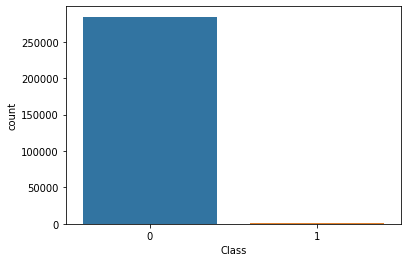

In [3]:
dataVisualize(card_data)

# Tree-Based Algorithms - Random Forest Classifier

#### Load trained model

In [4]:
RFC = Classifier('loadSavedModel',card_data)

enter path of model file
./rfc_model_v1.sav


#### Training classifier on data

In [5]:
RFC = Classifier('randomForestClassifier',card_data)

#Normalize Data
RFC.normalizeData()

# Train-Test Split
RFC.train_test_split()


In [6]:
# Training on train data 
RFC.train()

In [7]:
# Calling method to predict labels
RFC.predict_label()

# Calling method to predict probabilities
RFC.predict_probability()

In [8]:
filename = './rfc_model_v1.sav'
RFC.saveModel(filename)

#### Checking if classifier is predicting only one label

In [9]:
# Checking if classifier is predicting only one class
RFC.check_classifier_predicts_only_one_class()

np.unique( self.y_pred ) [0 1] 




#### Evaluating the area under the ROC curve

In [10]:
RFC.AreaUnderCurve()

roc_auc_score 0.9527452898717168 




#### Evaluating the accuracy on the upsampled dataset

In [11]:
RFC.Accuracy()

accuracy_score 0.9996137776061234 




#### Fetching the classification report

In [12]:
RFC.classificationReport()

classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.79      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.94     56962
weighted avg       1.00      1.00      1.00     56962
 




#### Plotting the ROC curve

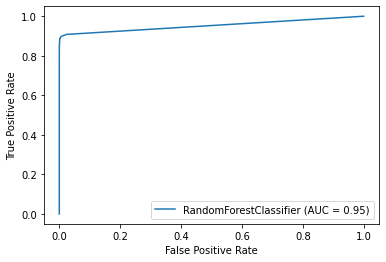

In [13]:
RFC.plot_ROC_curve()

#### Plotting the classifier vs random guessing classifier

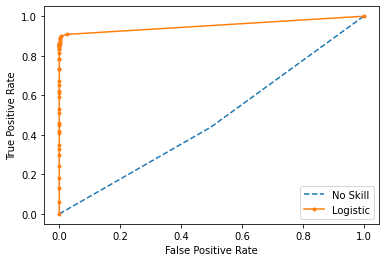

In [14]:
RFC.plot_classifierVSrandomGuess_ROC()

#### Stratified k fold cross validation to see whether RFC has overfit 

enter path of model file
./rfc_model_v1.sav
upsample minority class 'y' or 'n'
n
Strified k Fold Data: StratifiedKFold(n_splits=5, random_state=None, shuffle=False) 


TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
roc_auc_score 0.9778203397604415 


accuracy_score 0.9990871107053826 


classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.69      0.88      0.77        99

    accuracy                           1.00     56962
   macro avg       0.84      0.94      0.88     56962
weighted avg       1.00      1.00      1.00     56962
 




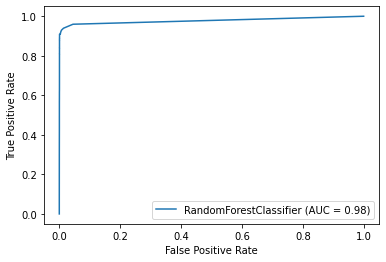

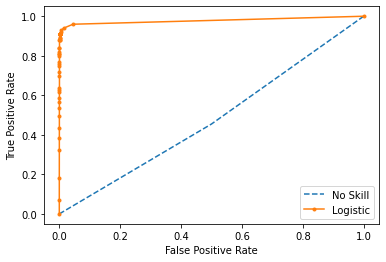

TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
roc_auc_score 0.9380328796645208 


accuracy_score 0.9995962220427653 


classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.78      0.87        99

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962
 




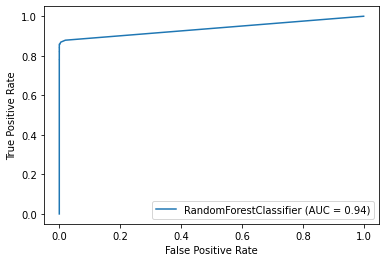

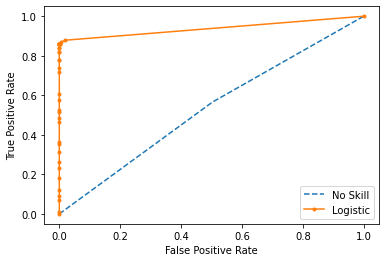

TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
roc_auc_score 0.9181319978882292 


accuracy_score 0.9991397622934991 


classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.80      0.67      0.73        98

    accuracy                           1.00     56961
   macro avg       0.90      0.84      0.86     56961
weighted avg       1.00      1.00      1.00     56961
 




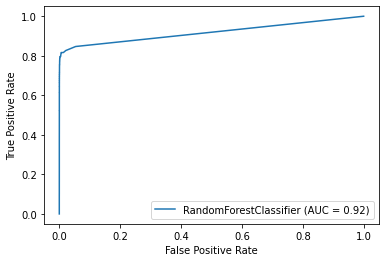

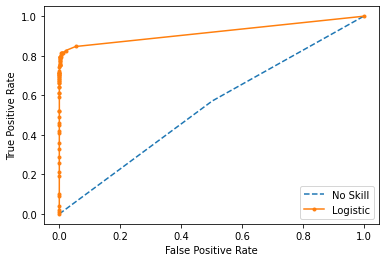

TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
roc_auc_score 0.9824714754797333 


accuracy_score 0.9996839943118976 


classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.83      0.90        98

    accuracy                           1.00     56961
   macro avg       0.99      0.91      0.95     56961
weighted avg       1.00      1.00      1.00     56961
 




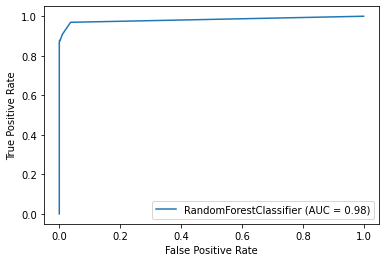

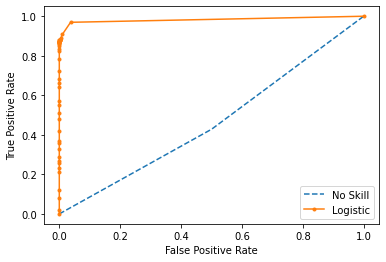

TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]
roc_auc_score 0.941711675789321 


accuracy_score 0.9994557679816014 


classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.70      0.82        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961
 




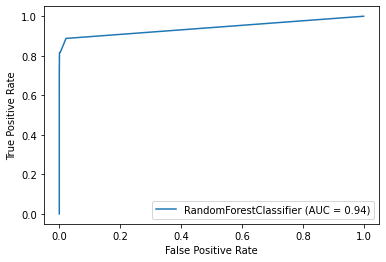

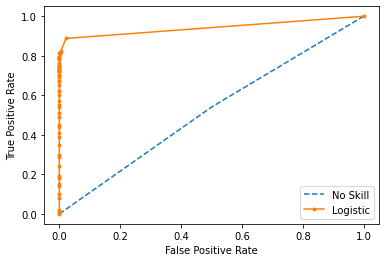

In [5]:
RFC_strat_kFold = stratified_Kfold_crossValidation('loadSavedModel',card_data)